# 1. Classification

# 1.1 Logistic Regression

**Logistic Regression** is a supervised learning algorithm used for **binary classification**.  
It models the probability that a given input \(x\) belongs to class \(1\) (positive class).  

---

**The Model Function**

Unlike Linear Regression (which predicts continuous values), Logistic Regression uses the **sigmoid function** to map predictions into probabilities between 0 and 1:

$$
\hat{y} = P(y=1 \mid x) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

where:
- \(z = w^T x + b\)  
- \(w\) = weight vector  
- \(b\) = bias (intercept)  
- \(\sigma(z)\) = sigmoid function  

The decision rule is:

$$
\hat{y} =
\begin{cases}
1 & \text{if } \sigma(z) \geq 0.5 \\
0 & \text{if } \sigma(z) < 0.5
\end{cases}
$$

---

**Maximum Likelihood Estimation**

To find the **best line (decision boundary)**, we use **Maximum Likelihood Estimation (MLE)**.  
We maximize the probability of the observed data under the model.  

The likelihood for \(m\) training examples is:

$$
L(w,b) = \prod_{i=1}^m P(y^{(i)} \mid x^{(i)}; w,b)
$$

Taking the log (log-likelihood):

$$
\ell(w,b) = \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]
$$
  


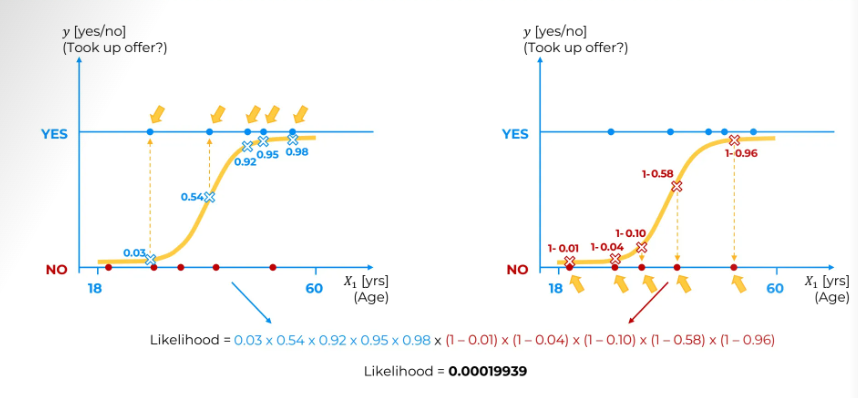


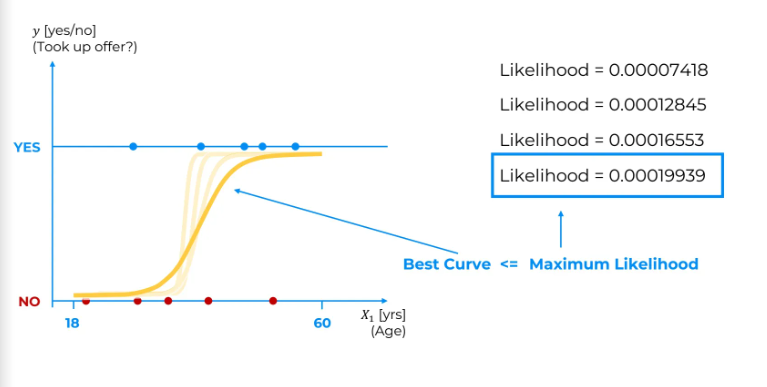

---

**Cost Function**

In practice, we minimize the **negative log-likelihood** (also called **Binary Cross-Entropy Loss**):

$$
J(w,b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]
$$

- This ensures convex optimization.  
- The best line is the one that **maximizes likelihood** (equivalently minimizes cost).



---

**Important Notes**

- Logistic Regression does **not** output class labels directly. It outputs **probabilities**.  
- A threshold (commonly 0.5) is applied to assign classes.  
- It assumes a **linear decision boundary** in the feature space.  

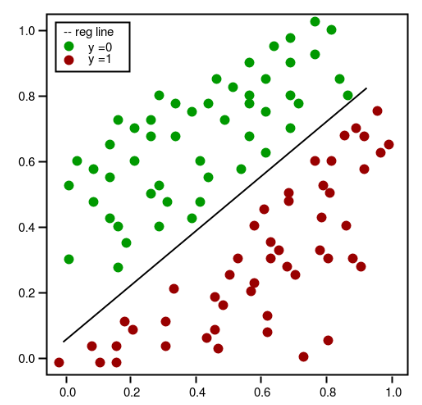


---


- Logistic Regression predicts probabilities using the **sigmoid function**.  
- The **best decision boundary** is the one that maximizes the **log-likelihood** of the data.  
- Equivalent cost function = **Binary Cross-Entropy**.  


In [2]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/data/Data_class.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
from sklearn.linear_model import LogisticRegression
classifier_log_reg = LogisticRegression(random_state = 0)
classifier_log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [6]:
y_hat_log_reg = classifier_log_reg.predict(X_test)

# 1.2 K-Nearest Neighbors (KNN)


**K-Nearest Neighbors (KNN)** is a simple supervised learning algorithm.
It is based on the idea that data points with similar features are likely to have similar outcomes.  

---

**Distance Metric**

The most common distance metric used in KNN is the **Euclidean Distance**:

$$
d(x, x_i) = \sqrt{\sum_{j=1}^n (x_j - x_{i,j})^2}
$$

where:
- \(x\) = new data point  
- \(x_i\) = training data point  
- \(n\) = number of features  

Other distances can also be used (Manhattan, Minkowski, Cosine), but Euclidean is the default.  

---

**Steps of the KNN Algorithm**

1. **Choose \(k\):**  
   Select the number of nearest neighbors to consider.  

2. **Compute distances:**  
   For a new input point \(x\), compute the Euclidean distance to **all** training points.  

3. **Find nearest neighbors:**  
   Select the \(k\) training points with the smallest distances.  

4. **Make a prediction:**  
   - **Classification:**  
     Assign the class label that is most frequent among the \(k\) neighbors (majority vote).  
   - **Regression:**  
     Predict the **average value** of the \(k\) neighbors.  

---

**Example**

- Suppose we want to classify a new point (red star).  
- Compute its distance to all training points.  
- If \(k = 3\):  
  - Check the 3 closest neighbors.  
  - If 2 are class A and 1 is class B → predict class A.  

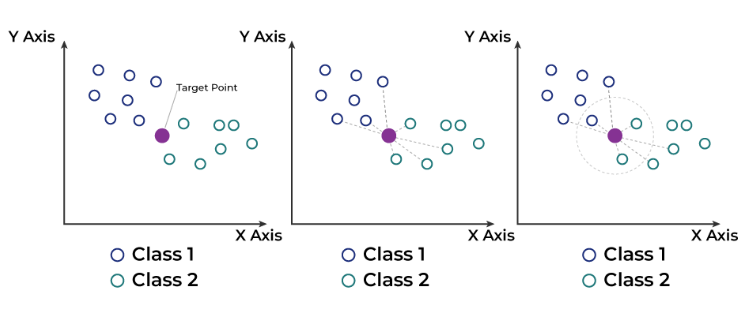


---

**Important Notes**

- **Choice of \(k\):**  
  - Small \(k\) → sensitive to noise (overfitting).  
  - Large \(k\) → smoother decision boundary but may underfit.  

- **Normalization:**  
  - Features should be scaled (e.g., using MinMaxScaler or StandardScaler) so that one feature does not dominate distances.  

- **Lazy learning:**  
  - No training phase; computation happens during prediction.  

---

- KNN classifies based on the labels/values of the **closest \(k\) neighbors**.  
- Uses **Euclidean distance** (by default) to measure similarity.  
- Simple, intuitive, but can be slow with large datasets.  


In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_hat_knn = classifier_knn.predict(X_test)

# 1.3 Support Vector Machines (SVM)



Support Vector Machine (SVM) is a supervised learning algorithm used for **classification** (and regression).  
It tries to find the **best decision boundary (hyperplane)** that separates different classes with the **maximum margin**.  

---

**Linear SVM**

For linearly separable data, the SVM finds a hyperplane:

$$
f(x) = w^T x + b
$$

- \(w\): weight vector (normal to the hyperplane).  
- \(b\): bias (offset).  

The decision boundary is defined by:

$$
w^T x + b = 0
$$

The goal is to maximize the **margin**:

$$
\text{Margin} = \frac{2}{\|w\|}
$$

---

**Soft Margin (C parameter)**

In practice, data is often **not perfectly separable**.  
We introduce a slack variable \(\xi_i\) to allow misclassifications:

$$
\min_{w,b} \; \frac{1}{2} \|w\|^2 + C \sum_{i=1}^m \xi_i
$$

- \(C\) = regularization parameter:  
  - Large \(C\): less tolerance for errors → smaller margin (risk of overfitting).  
  - Small \(C\): more tolerance → larger margin (risk of underfitting).  

---

**Non-Linear SVM and the Kernel Trick**

Sometimes data is **not linearly separable** in the original space.  
The **Kernel Trick** maps input data into a higher-dimensional space where it becomes linearly separable.

Instead of explicitly transforming data, we use a **kernel function**:

$$
K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

- \( \phi(\cdot) \) = mapping to higher-dimensional space.  
- \(K\) = kernel function that computes dot product in that space efficiently.  

---

**Common Kernels**

| Kernel      | Formula                                                                 | Notes |
|-------------|-------------------------------------------------------------------------|-------|
| Linear      | \(K(x, z) = x^T z\)                                                     | For linearly separable data |
| Polynomial  | \(K(x, z) = (x^T z + c)^d\)                                             | Captures polynomial boundaries (quadratic, cubic, etc.) |
| RBF (Gaussian) | \(K(x, z) = \exp\Big(-\frac{\|x-z\|^2}{2\sigma^2}\Big)\)             | Most popular; handles highly non-linear data |
| Sigmoid     | \(K(x, z) = \tanh(\alpha x^T z + c)\)                                   | Related to neural networks |

---

**Visualization**

### Linear SVM
- Finds a straight line (2D) or hyperplane (nD) that separates the data.  

![Linear SVM](https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png)

---

### Non-Linear SVM (Kernel Trick)
- Maps data into higher dimensions and separates with a hyperplane (appears curved in original space).  


 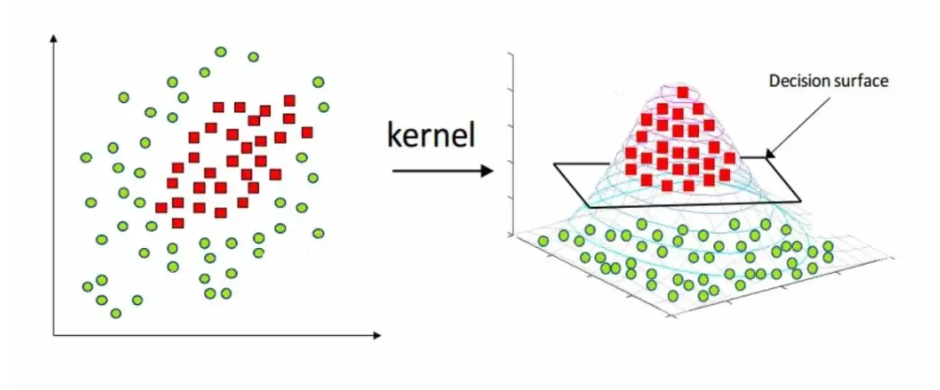
## 6) Important Notes

- **Hyperparameters**:  
  - `C`: controls margin vs misclassification trade-off.  
  - `kernel`: choice of kernel function (`linear`, `poly`, `rbf`, `sigmoid`).  
  - `gamma`: parameter for RBF/Polynomial kernels (controls influence of single training example).  

- **Advantages**:  
  - Powerful for both linear and non-linear classification.  
  - Works well with high-dimensional data.  

- **Disadvantages**:  
  - Computationally expensive for large datasets.  
  - Choosing kernel & parameters requires tuning.  


In [9]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)

SVC(random_state=0)

In [10]:
y_hat_svc = classifier_svc.predict(X_test)

# 1.4 Naïve Bayes Classifier


**Naïve Bayes** is a probabilistic classifier based on **Bayes' Theorem**, with the assumption that features are **conditionally independent** given the class label.  
It is simple, fast, and effective for many text classification tasks (e.g., spam detection, sentiment analysis).  

---

**Bayes' Theorem**

The probability of a class \(C_k\) given features \(x = (x_1, x_2, \dots, x_n)\) is:

$$
P(C_k \mid x) = \frac{P(x \mid C_k) \; P(C_k)}{P(x)}
$$

- \(P(C_k)\): prior probability of class \(C_k\)  
- \(P(x \mid C_k)\): likelihood of data given the class  
- \(P(x)\): probability of data (acts as a normalizing constant)  

---

**Naïve Assumption**

Naïve Bayes assumes **independence** between features:

$$
P(x \mid C_k) = \prod_{j=1}^n P(x_j \mid C_k)
$$

So:

$$
P(C_k \mid x) \propto P(C_k) \prod_{j=1}^n P(x_j \mid C_k)
$$

The predicted class is the one with the highest posterior probability:

$$
\hat{C} = \arg \max_{C_k} P(C_k) \prod_{j=1}^n P(x_j \mid C_k)
$$

---

**Types of Naïve Bayes**

Different versions of Naïve Bayes assume different distributions for features:

| Variant            | Feature Assumption                                    | Example Use Case |
|--------------------|--------------------------------------------------------|------------------|
| **Gaussian NB**    | Features follow a **normal distribution**              | Continuous data (e.g., iris dataset) |
| **Multinomial NB** | Features are **counts** (integers)                     | Text classification, word counts |
| **Bernoulli NB**   | Features are **binary** (0/1, presence/absence)        | Document classification, spam filters |

---

**Steps of Naïve Bayes Algorithm**

1. **Compute priors:**  
   Estimate \(P(C_k)\) for each class from training data.  

2. **Compute likelihoods:**  
   For each feature and class, estimate \(P(x_j \mid C_k)\).  
   - Gaussian: use mean and variance  
   - Multinomial: use frequency counts  
   - Bernoulli: use presence/absence  

3. **Apply Bayes' theorem:**  
   Combine priors and likelihoods to compute posterior probability for each class.  

4. **Prediction:**  
   Choose the class with the highest posterior probability.  

---

**Advantages and Disadvantages**

- **Advantages:**  
  - Very fast and efficient  
  - Works well with high-dimensional data (e.g., text)  
  - Requires relatively small training data  

- **Disadvantages:**  
  - Assumes feature independence (often unrealistic)  
  - Can perform poorly if features are highly correlated  

---

**Example Visualization**

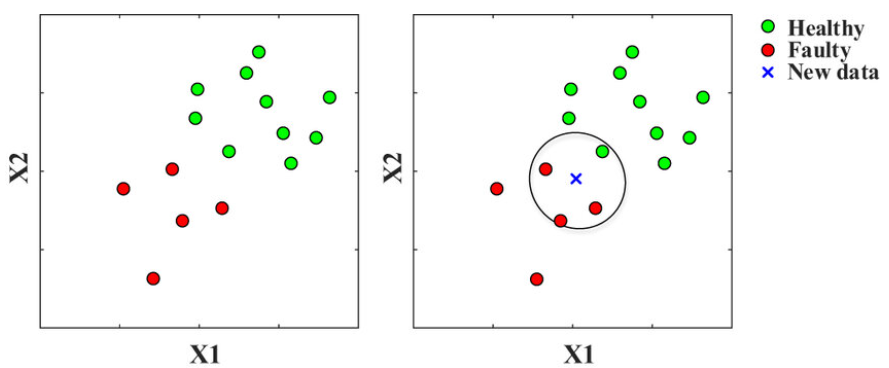


---


- Naïve Bayes applies **Bayes' Theorem** with the independence assumption.  
- The best class is the one with **maximum posterior probability**.  


In [11]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [12]:
y_hat_nb = classifier_nb.predict(X_test)

3 1.4 Decision Tree for Classification



A **Decision Tree Classifier** is a supervised learning algorithm used for **categorical outputs** (classes).  
It recursively splits the dataset into regions based on **feature thresholds** to maximize class purity in each node.  

---

**1. How does it work?**

At each node:
1. Select a **feature** (e.g., age, exam score, income).  
2. Try different **thresholds** for splitting.  
3. Measure the **impurity** of the split (using Gini or Entropy).  
4. Choose the split that gives the **highest information gain** (largest impurity reduction).  

---

**2. Impurity Measures (Classification)**

### 2.1 Gini Impurity
$$
G = 1 - \sum_{k=1}^K p_k^2
$$

- \(p_k\) = proportion of class \(k\) samples in the node.  
- Lower \(G\) = purer node.  

---

### 2.2 Entropy
$$
H = - \sum_{k=1}^K p_k \log_2(p_k)
$$

- \(H = 0\): perfectly pure (all samples same class).  
- Higher entropy = more mixed classes.  

---

**3. Information Gain**

The improvement from a split is:

$$
IG = I(\text{parent}) - \Big( \frac{n_\text{left}}{n} I(\text{left}) + \frac{n_\text{right}}{n} I(\text{right}) \Big)
$$

- \(I\) = impurity (Gini or Entropy).  
- The split with the **highest IG** is chosen.  


---

**4. Important Notes**

- **Hyperparameters**:  
  - `criterion` → "gini" or "entropy".  
  - `max_depth` → maximum tree depth.  
  - `min_samples_split` → minimum samples required to split a node.  
  - `min_samples_leaf` → minimum samples per leaf.  

- **Advantages**:  
  - Easy to understand and interpret.  
  - Handles both numerical and categorical features.  

- **Disadvantages**:  
  - Can easily **overfit** (needs pruning).  
  - Unstable: small data changes can lead to different splits.  

---

- Decision Tree Classification uses **Gini** or **Entropy** to choose splits.  
- Each leaf node predicts a **class** (majority vote).  
- They are interpretable but need pruning/regularization to generalize well.  


###  Example: Decision Tree Classification with Entropy

We will classify students into **Pass** or **Fail** based on their **Study Hours**.

---

## 1) Dataset

| Student | Study Hours | Class |
|---------|-------------|-------|
| A       | Low         | Fail  |
| B       | Low         | Fail  |
| C       | High        | Pass  |
| D       | Medium      | Pass  |
| E       | Medium      | Fail  |

---

## 2) Step 1: Parent Node Entropy

At the root, we have 5 samples:  
- **Pass = 2**  
- **Fail = 3**

$$
H(\text{parent}) = - \Big( \frac{2}{5}\log_2\frac{2}{5} + \frac{3}{5}\log_2\frac{3}{5} \Big)
$$

$$
H(\text{parent}) = - (0.4 \cdot -1.32 + 0.6 \cdot -0.74) = 0.97
$$

---

## 3) Step 2: Split on "Study Hours"

- **Case 1: Low**
  - 2 samples → both Fail  
  - \(H = 0\) (pure)

- **Case 2: High**
  - 1 sample → Pass  
  - \(H = 0\) (pure)

- **Case 3: Medium**
  - 2 samples → 1 Pass, 1 Fail
$$
H = - (0.5 \log_2 0.5 + 0.5 \log_2 0.5) = 1\
$$
---

## 4) Step 3: Weighted Average Entropy After Split

$$
H(\text{split}) = \frac{2}{5}(0) + \frac{1}{5}(0) + \frac{2}{5}(1) = 0.4
$$

---

## 5) Step 4: Information Gain

$$
IG = H(\text{parent}) - H(\text{split})
$$

$$
IG = 0.97 - 0.40 = 0.57
$$

---

## 6) Result

- The split on **Study Hours** reduces entropy by **0.57**,  
- So the root node decision is:  
  - If **Low → Fail**  
  - If **High → Pass**  
  - If **Medium → Need further split (still mixed)**  

---


Using **Entropy**, the best split is **Study Hours**, because it gave the highest **Information Gain (0.57)**.  


In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion='entropy')
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_hat_dt = classifier_dt.predict(X_test)

# 1.5 Random Forest



Random Forest is an **ensemble learning method** that builds multiple decision trees and combines their results.  
It can be used for both **regression** and **classification** tasks.  

---

**Intuition**

- Instead of relying on a single decision tree (which may overfit), Random Forest builds **many trees**.  
- Each tree is trained on a **random subset of data** and uses a **random subset of features**.  
- The results are then combined:
  - **Classification:** by majority voting.

---

**Algorithm Steps**

1. Select a random sample (with replacement) of the dataset → **Bootstrap Sampling**.  
2. Grow a decision tree on this sample.  
   - At each split, only a **random subset of features** is considered.  
3. Repeat the process for many trees.  
4. Combine predictions:
   - **Classification:** majority vote across trees.

---

**Mathematical Formulation**

For regression with \(T\) trees:

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} f_t(x)
$$

where:
- \(f_t(x)\) = prediction from tree \(t\).  
- The final output is the average of all tree outputs.  

---

**Important Hyperparameters**


- **n_estimators**: number of trees (more trees → better performance but slower).  
- **max_depth**: maximum depth of each tree.  
- **min_samples_split**: minimum samples to split a node.  
- **max_features**: number of features to consider at each split.  
- **bootstrap**: whether to use sampling with replacement.  

---

**Advantages**
- Reduces **overfitting** compared to a single decision tree.  
- Works well with both linear and non-linear data.  
- Handles high-dimensional data and missing values.  

---

**Disadvantages**
- Less interpretable than a single tree (hard to visualize).  
- Requires more computation and memory.  
- Slower prediction when the number of trees is very large.  

---

Random Forest is a powerful and widely used algorithm that combines multiple decision trees to improve accuracy and stability.  
It is one of the most popular algorithms for both regression and classification tasks.  


In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
y_hat_rf = classifier_rf.predict(X_test)

# 2. Evaluating Classification Models


When evaluating classification models, it is important **not to rely on a single metric** such as accuracy.  
Accuracy can be misleading, especially in cases where the dataset is **imbalanced** (one class is much more frequent than the other).  

---

**2.1 Accuracy**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- Measures the overall proportion of correct predictions.  
- Works well when classes are **balanced**.  
- Problem: In imbalanced datasets, a model may predict only the majority class and still achieve high accuracy.  

**Example:**  
- Dataset: 95% Healthy, 5% Sick.  
- Model always predicts “Healthy.”  
- Accuracy = 95% (but model is useless at detecting Sick patients).  

---

**2.2 Precision**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- Out of all predicted positives, how many are truly positive?  
- Important when the **cost of false positives** is high (e.g., spam detection).  

---

**2.3 Recall (Sensitivity)**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- Out of all actual positives, how many did the model correctly identify?  
- Important when the **cost of false negatives** is high (e.g., cancer detection).  

---

**2.4 F1-Score**

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- Harmonic mean of precision and recall.  
- Useful when classes are imbalanced.  

---

**2.5 Confusion Matrix**

A table showing counts of correct and incorrect predictions:

|              | Predicted Positive | Predicted Negative |
|--------------|--------------------|--------------------|
| Actual Positive | TP (True Positive) | FN (False Negative) |
| Actual Negative | FP (False Positive) | TN (True Negative) |

- Provides a complete picture of model performance.  

---


- **Accuracy alone is not enough.**  
- For imbalanced datasets, always consider **Precision, Recall, and F1-Score.**  
- Use **Confusion Matrix** to see detailed errors.  
- Use **ROC/AUC** for threshold-based evaluation.  

**Example:**  
In medical diagnosis, a model with 95% accuracy may still miss many sick patients if the dataset is imbalanced.  
That’s why **Recall** and **F1-score** are critical.  


### Example: Evaluating Classification Metrics with Numbers

Suppose we are building a model to detect a **rare disease**.  
Dataset: 100 patients → 95 Healthy, 5 Sick.  

---

## 1) Confusion Matrix

|                | Predicted Sick | Predicted Healthy |
|----------------|----------------|------------------|
| **Actual Sick**    | TP = 2         | FN = 3           |
| **Actual Healthy** | FP = 5         | TN = 90          |

---

## 2) Metrics

### Accuracy
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
= \frac{2 + 90}{100} = 92\%
$$

⚠️ Looks good, but the model missed 3 out of 5 sick patients!

---

### Precision
$$
\text{Precision} = \frac{TP}{TP + FP}
= \frac{2}{2+5} = 0.29 \;(29\%)
$$

Only 29% of predicted Sick are actually Sick → many false alarms.  

---

### Recall (Sensitivity)
$$
\text{Recall} = \frac{TP}{TP + FN}
= \frac{2}{2+3} = 0.40 \;(40\%)
$$

The model only catches 40% of actual Sick patients → very risky in medicine.  

---

### F1-Score
$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
= 2 \cdot \frac{0.29 \cdot 0.40}{0.29 + 0.40} = 0.33 \;(33\%)
$$

Balanced measure → shows weak performance.  

---

## 3) Key Insight

- **Accuracy (92%)** suggests the model is good.  
- But **Precision (29%)** and **Recall (40%)** show it is poor at detecting the rare disease.  
- **F1-Score (33%)** confirms the weakness.  

---


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm_log_reg = confusion_matrix(y_test, y_hat_log_reg)
print(cm_log_reg)
print("Logistic Regression: ", accuracy_score( y_test, y_hat_log_reg))
print(classification_report(y_test, y_hat_log_reg))

cm_knn = confusion_matrix(y_test, y_hat_knn)
print(cm_knn)
print("KNN: ", accuracy_score( y_test, y_hat_knn))
print(classification_report(y_test, y_hat_knn))

cm_svc = confusion_matrix(y_test, y_hat_svc)
print(cm_svc)
print("SVC: ", accuracy_score( y_test, y_hat_svc))
print(classification_report(y_test, y_hat_svc))

cm_dt = confusion_matrix(y_test, y_hat_dt)
print(cm_dt)
print("Decision Tree: ", accuracy_score( y_test, y_hat_dt))
print(classification_report(y_test, y_hat_dt))

cm_rft = confusion_matrix(y_test, y_hat_rf)
print(cm_rft)
print("Random Forest: ", accuracy_score( y_test, y_hat_rf))
print(classification_report(y_test, y_hat_rf))




[[103   4]
 [  5  59]]
Logistic Regression:  0.9473684210526315
              precision    recall  f1-score   support

           2       0.95      0.96      0.96       107
           4       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

[[103   4]
 [  5  59]]
KNN:  0.9473684210526315
              precision    recall  f1-score   support

           2       0.95      0.96      0.96       107
           4       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

[[102   5]
 [  3  61]]
SVC:  0.9532163742690059
              precision    recall  f1-score   support

           2       0.97      0.95      0.96       107
           4       0.92      0.95      0.94        64

    accuracy          

# 3. Conclusion

---

Classification is one of the most fundamental tasks in Machine Learning.  
From simple models like **Logistic Regression** to more advanced ones such as **KNN, SVM, Decision Trees, Random Forests, and Naive Bayes**,  
each algorithm offers a unique way of separating data into meaningful categories.  

---

- **Model Choice:**  
  - Start with simple models (e.g., Logistic Regression) for interpretability.  
  - Use more flexible models (e.g., SVM, Random Forest) when data is complex or non-linear.  

- **Parameters (Hyperparameters):**  
  - Always tune critical parameters like `C`, `kernel`, `k (neighbors)`, `max_depth`, etc.  
  - Use **cross-validation** to avoid overfitting and select the best model.  

- **Evaluation Metrics:**  
  - Accuracy alone is not enough (especially with imbalanced data).  
  - Always check **Precision, Recall, F1-score, ROC-AUC** for a complete evaluation.  

- **Practical Advice:**  
  - Be cautious with imbalanced datasets (use resampling or weighted metrics).  
  - Interpretability vs. accuracy is a trade-off: choose based on the use case.  
  - Ensemble methods (like Random Forest) often give robust performance but are harder to interpret.  

---

**Final Thought:**  
Classification algorithms are the backbone of decision-making systems.  
The **real power** lies not in picking one “perfect” model, but in understanding the **strengths and limitations** of each,  
and using the right evaluation metrics to ensure fairness, reliability, and trust in your predictions.  

---
